# **Random Forests** #

**Classification**

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

**Loading Dataset**

In [2]:
df = pd.read_csv("../../Datasets/BankNote_Authentication.csv")

df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


**Checking for Duplicates and Missing Values**

In [9]:
print(df.isnull().sum().sum())

0


In [12]:
print(df.duplicated().sum())

24


In [13]:
df = df.drop_duplicates()

The Dataset is clean and fairly simple already.

**Train/Test Split**

In [16]:
#Defining the dataset into X & Y 

X = df.drop(["class"], axis=1)
y = df[["class"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


**RandomizedSearchCV**

we will use RandomizedSearchCV to find the best parameters quickly

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

 # initialize testable parameters
 # Since we have to wrap LinearSVC into CalibratedClassifierCV
 # we have to use this estimator__ prefix in the parameters
param_dist = {
     'n_estimators': [25, 35, 40, 50, 60, 70, 75, 100],
     'max_depth': [3,4,5,6,7,8,9,10,11,12],
 }

 # start finding the optimal parameters with RandomizedSearchCV!
 # RandomizedSearchCV is usually way faster than GridSearchCV
 # .... but it's also mostly random
test_model = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=1200, verbose=3, n_jobs=-1, cv=5, random_state=42)
test_model.fit(X_train, y_train)

c:\Users\stsaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 80 is smaller than n_iter=1200. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 80 candidates, totalling 400 fits


c:\Users\stsaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=1200,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12],
                                        'n_estimators': [25, 35, 40, 50, 60, 70,
                                                         75, 100]},
                   random_state=42, verbose=3)

In [46]:
test_model.best_params_

{'n_estimators': 70, 'max_depth': 9}

In [47]:
test_model.best_score_

0.996039603960396

**Random Forest Model**

In [51]:
model = make_pipeline(StandardScaler(), RandomForestClassifier())
model.fit(X_train, y_train)

c:\Users\stsaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

**Metrics**

In [52]:
#making test predictions 
predictions = model.predict(X_test)

# printing the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# getting overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       183
           1       0.97      1.00      0.99       154

    accuracy                           0.99       337
   macro avg       0.99      0.99      0.99       337
weighted avg       0.99      0.99      0.99       337


Model overall accuracy: 98.81%


The metrics show that the model is working almost perfectly.

[[179   4]
 [  0 154]]


<Axes: >

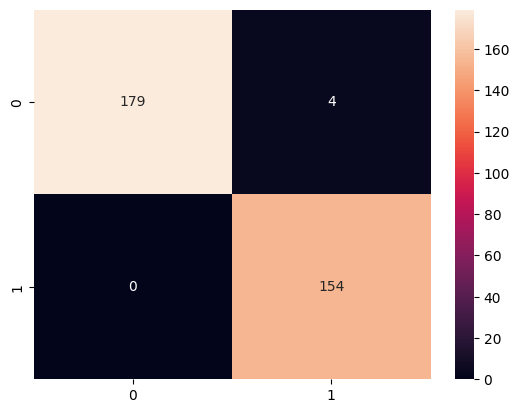

In [53]:
print(confusion_matrix(y_test, predictions))

sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

In [54]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])


1.0

ROC AUC score of 1.0 shows that its performing perfectly.

In [38]:
df.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [57]:
# Gender -column: 0 => Female, 1 => Male
tester_row = {
    'variance': 0.40614,
    'skewness': 1.3492,
    'curtosis': -1.4501,
    'entropy': -0.55949
}

# creating a pandas DataFrame and scale the values
tester_row = pd.DataFrame([tester_row])

print("All probabilities by category:")
print(model.predict_proba(tester_row))
print()

# change these based on your original data
labels = ["No", "Yes"]

print("Is this Bank Note Fake (No/Yes):")
result = labels[model.predict(tester_row)[0]]
print(result)
print("-------------------")

All probabilities by category:
[[0.09 0.91]]

Is this Bank Note Fake (No/Yes):
Yes
-------------------


**Summary**

We have imported all the libraries first then we imported the data and checked for duplicates and misssing values and dropped missing values. We used RandomizedSearchGrid to find best parameters and  trained the model and checked metrics which are really good and ROC AUC for the model showed 1.0 which is very good.


